In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
cd /Users/austinmcdonald/Desktop/Nexus-100kg/

/Users/austinmcdonald/Desktop/Nexus-100kg


In [3]:
os.listdir()

['.DS_Store',
 'Algo-paramaters.txt',
 'bb0nu',
 'bb0nu-E.txt',
 'bb2nu',
 'Bi214',
 'Bi214-E.txt',
 'Cuts.pdf',
 'CutsTable-updated.pdf',
 'CutsTable.pdf',
 'Log',
 'Plots',
 'sensitivity next100.pdf',
 'Tl208',
 'Tl208-E.txt',
 'Vox.txt']

In [5]:
Tl = np.genfromtxt('Tl208-E.txt')
Bi = np.genfromtxt('Bi214-E.txt')
bb = np.genfromtxt('bb0nu-E.txt')
print('Tl events =',len(Tl))
print('Bi events =',len(Bi))
print('bb events =',len(bb))

Tl events = 23536
Bi events = 488
bb events = 7794


In [70]:
Bins = np.linspace(2.3,3.0,29)
Bins = np.linspace(2.3,3.0,72)
#Bins = np.linspace(2.3,3.0,200)

Bins[2]-Bins[1]

0.0098591549295772296

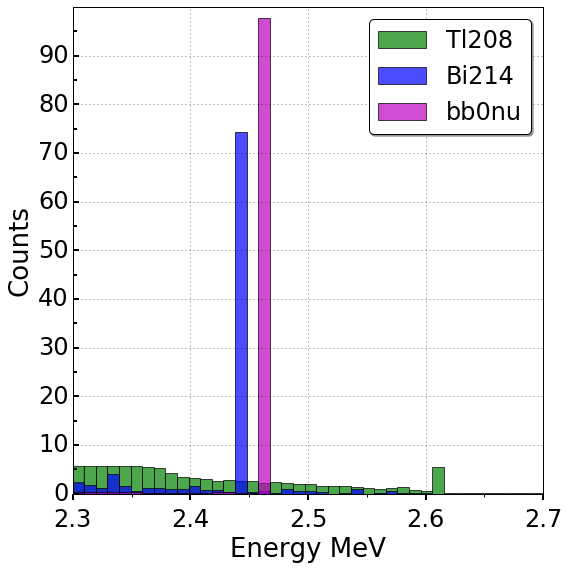

In [71]:
fig, ax = plt.subplots(figsize=(8,8))
#plt.hist(Tl,bins=Bins,normed=True,alpha=0.7,label='Tl208')
#plt.hist(Bi,bins=Bins,normed=True,alpha=0.7,label='Bi214')
#plt.hist(bb,bins=Bins,normed=True,alpha=0.7,label='bb0nu')
plt.hist(Tl,bins=Bins,alpha=0.7,label='Tl208',color='g',normed=1e7)
plt.hist(Bi,bins=Bins,alpha=0.7,label='Bi214',color='b',normed=1e7)
plt.hist(bb,bins=Bins,alpha=0.7,label='bb0nu',color='m',normed=1e4)

plt.ylabel("Counts",fontsize=26)
plt.xlabel("Energy MeV",fontsize=26)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
xmajor_ticks = np.arange(2.3, 2.7, 0.1)
xminor_ticks = np.arange(2.3, 2.7, 0.05)
ymajor_ticks = np.arange(0, 100, 10)
yminor_ticks = np.arange(0, 100, 5)
ax.tick_params(axis = 'x', which = 'major', direction='out',width=2,length=6,top="off",right='off')
ax.tick_params(axis = 'x', which = 'minor', direction='out',width=1,length=3,top="off",right='off')
ax.tick_params(axis = 'y', which = 'major', direction='in',width=2,length=6,top="off",right='off')
ax.tick_params(axis = 'y', which = 'minor', direction='in',width=2,length=4,top="off",right='off')
ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor = True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor = True)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper right',fontsize=24,shadow=True, fancybox=True)
plt.xlim(2.3,2.7)
plt.ylim(0,100)
plt.grid(True)
plt.tight_layout()

#plt.savefig('/Users/austinmcdonald/Desktop/energyNoCut.pdf')
plt.show()

In [72]:
def smearing(Arry,sigma, size=1):
    LL = len(Arry)
    Out = np.array([])
    for x in range(0,LL):
        Point = Arry[x]
        smr   = np.random.normal(Point, sigma, size)
        Out = np.append(Out,smr)
    return Out
        
    

In [73]:
TlS = smearing(Tl,0.0075/2.355)
BiS = smearing(Bi,0.0075/2.355)
bbS = smearing(bb,0.0075/2.355)

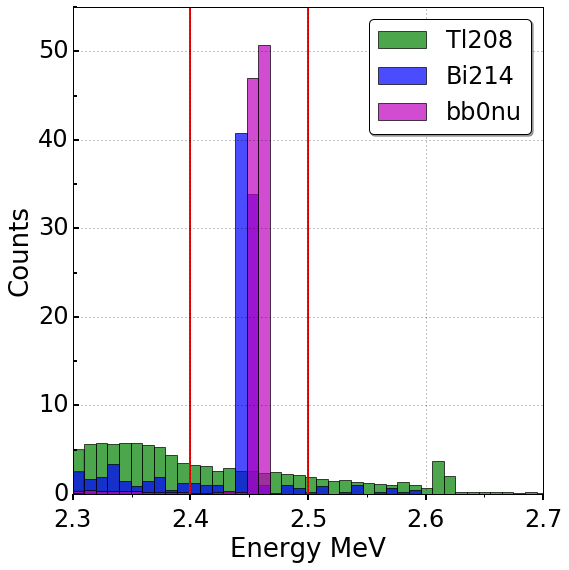

In [74]:
fig, ax = plt.subplots(figsize=(8,8))
#plt.hist(Tl,bins=Bins,normed=True,alpha=0.7,label='Tl208')
#plt.hist(Bi,bins=Bins,normed=True,alpha=0.7,label='Bi214')
#plt.hist(bb,bins=Bins,normed=True,alpha=0.7,label='bb0nu')
plt.hist(TlS,bins=Bins,alpha=0.7,label='Tl208',color='g',normed=1e7)
plt.hist(BiS,bins=Bins,alpha=0.7,label='Bi214',color='b',normed=1e7)
plt.hist(bbS,bins=Bins,alpha=0.7,label='bb0nu',color='m',normed=1e4)

plt.ylabel("Counts",fontsize=26)
plt.xlabel("Energy MeV",fontsize=26)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
xmajor_ticks = np.arange(2.3, 2.7, 0.1)
xminor_ticks = np.arange(2.3, 2.7, 0.05)
ymajor_ticks = np.arange(0, 100, 10)
yminor_ticks = np.arange(0, 100, 5)
ax.tick_params(axis = 'x', which = 'major', direction='out',width=2,length=6,top="off",right='off')
ax.tick_params(axis = 'x', which = 'minor', direction='out',width=1,length=3,top="off",right='off')
ax.tick_params(axis = 'y', which = 'major', direction='in',width=2,length=6,top="off",right='off')
ax.tick_params(axis = 'y', which = 'minor', direction='in',width=2,length=4,top="off",right='off')
ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor = True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor = True)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper right',fontsize=24,shadow=True, fancybox=True)
plt.xlim(2.3,2.7)
plt.ylim(0,55)
plt.grid(True)
plt.axvline(2.4,color='r',linewidth=2)
plt.axvline(2.5,color='r',linewidth=2)
plt.tight_layout()

#plt.savefig('/Users/austinmcdonald/Desktop/energySmeared.pdf')
plt.show()

In [63]:
TT = TlS[TlS>2.4]
TTT = TT[TT<2.5]
len(TTT)

6031

In [64]:
TT = Tl[Tl>2.4]
TTT = TT[TT<2.5]
len(TTT)

6021

In [29]:
np.arange(0,5)

array([0, 1, 2, 3, 4])

In [65]:
TT = bbS[bbS>2.4]
TTT = TT[TT<2.5]
len(TTT)

7592

In [66]:
TT = BiS[BiS>2.4]
TTT = TT[TT<2.5]
len(TTT)

389

In [44]:
TT = Bi[Bi>2.4]
TTT = TT[TT<2.5]
len(TTT)

389

In [27]:
Vox = np.genfromtxt('Vox.txt')

In [24]:
Vox[0::4]

array([ -4.8516674 ,  -4.8516674 ,   3.28775668,  11.42718124,
        11.42718124,  11.42718124,  11.42718124,  19.56660461,  19.56660461])

In [25]:
import matplotlib
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
def scatter3d(Vox, colorsMap='jet'):
    x = Vox[0::4]
    y = Vox[1::4]
    z = Vox[2::4]
    cs = Vox[3::4]
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs),s=100)
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    plt.show()

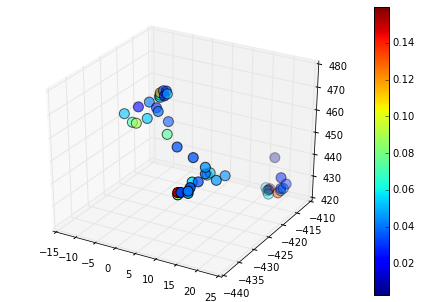

In [28]:
scatter3d(Vox)

In [ ]:
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
def scatter3d(x,y,z, cs, colorsMap='jet'):
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    plt.show()